In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import detrend
from datetime import datetime
import numpy.random as rand
from datetime import timedelta

%matplotlib inline

def estimateGaussian(x):
    m, n = x.shape
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    mu = (1/m)*np.nansum(x, axis=0)
    sigma2 = (1/(m-1))*np.nansum((x-mu)**2,axis=0)  
    return mu, sigma2
          
def detrending (x):
    s = np.zeros((len(x), len(x[0])))
    for i in range(len(x)):
        for j in range(len(x[0])):
            s[i,j] = np.nansum(x[i,j])
    for i in range(len(x[0])):
        s[:,i] = detrend(s[:,i])
    return s

def expotential ( f_detrend, alpha = 0.1):
    s = np.zeros((len(f_detrend), len(f_detrend[0])))
    s[0,:] = f_detrend[0,:]
    for i in range(1,len(f_detrend)):
        s[i,:] = alpha*f_detrend[i,:]+(1-alpha)*s[i-1,:]
    return s

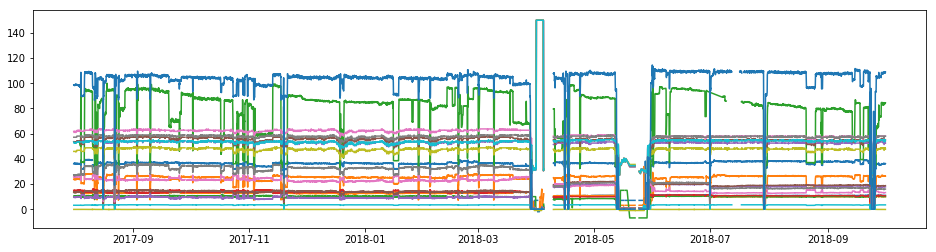

In [2]:
# Read files
df= pd.read_excel('Data_new_21.xlsx')
names=['Date & Time','FI_C771J1.PV','FI_C771J2.PV','HC_C771L.OP','HC_C771J1.OP','TI_C771T11.PV','TI_C771T21.PV','TI_C771T31.PV','TI_C771T41.PV','TI_C771T51.PV','TI_C771T61.PV','VI_C771X11.PV','VI_C771X21.PV','VI_C771W11.PV','VI_C771W21.PV','VI_C771V11.PV','VI_C771V21.PV','VI_C771U11.PV','VI_C771U21.PV','PI_C771C2.PV','PI_C771H.PV','IT_C771F']

# # Smoothing and estimating
data = np.array(df)[:,:-1]
s = expotential(detrending(data[:,1:9200].astype(np.float)),0.99)
mu, sigma2 = estimateGaussian(s)
            
plt.figure(figsize=(16,4))
plt.plot(data[:,0], data[:,1:])
plt.show()

## Correlarion

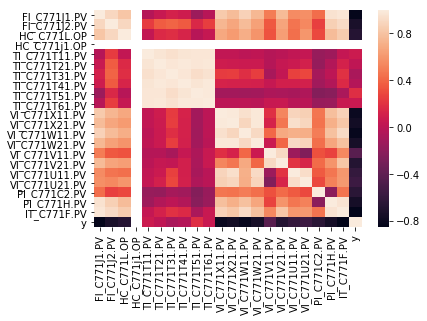

In [3]:
import seaborn as sns

sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)

## Add shum for formattinf total data

In [4]:
new_21_data = data[:8014,1:]
total_data = new_21_data

y = df['y'].values.tolist()[:len(new_21_data)]
total_y = y

for j in range(10):
    total_data = np.concatenate((total_data, np.array([new_21_data[i,:]+(rand.uniform(np.power(sigma2, 1/5))) for i in range(len(new_21_data))])), axis=0)
    total_y = total_y+y
    
#  Dates sxis 
dates = data[:len(new_21_data),0]
total_dates = dates.tolist()

for i in range(10):
    if total_dates[0].year % 4 == 1 :
        days_in_previ_year = 366
    else:
        days_in_previ_year = 365
    k = [ total_dates[j] - timedelta( days = 365 ) for j in range(len(dates))]
    total_dates = k + total_dates

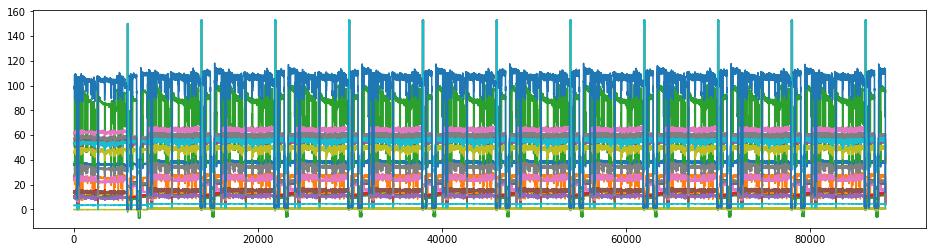

In [5]:
# Plotting
plt.figure(figsize=(16,4))
plt.plot(total_data)
plt.show()   